# Aplicações práticas

# 4.1 Exercício 1: Uniformização de escalas

## A. Enunciado 

Com base no European Social Survey (ESS), recolheu-se uma amostra aleatória de 29.895 cidadãos, avaliados em 674 variáveis. Pretende-se uniformizar as escalas dos itens do construto "Autoavaliação da Saúde", que agrega as variáveis C15 "Como avalia a sua saúde em geral?" (1 – Muito boa, 2 – Boa, 3 – Razoável, 4 – Má, 5 – Muito má) e C16 "Está de alguma forma limitado nas suas atividades diárias devido a uma doença prolongada, uma deficiência ou um problema de saúde do foro psicológico?" (1 – Sim, muito; 2 – Sim, de alguma forma; 3 – Não).

A Tabela 1 apresenta a base de dados com os primeiros 13 casos (ID = 1 até 13) das variáveis C15 e C16, do ficheiro "cap04_Exerc1_uniformização de escalas.sav". As restantes variáveis foram obtidas para o cálculo do construto "Autoavaliação da Saúde". As Tabelas 2 e 3 apresentam as frequências das variáveis C15R, C16 e C16 Nova Escala. A Tabela 4 apresenta os países da OCDE que fazem parte do ESS.


# Resolução em Python

## Carregando Bibliotecas

In [2]:
import pandas as pd  # Fornece DataFrames e Series para manipulação de dados em Python, facilitando operações como leitura, escrita, e manipulação de estruturas de dados tabulares.
import pyreadstat # Permite a leitura de arquivos `.sav` do SPSS em Python.

In [2]:
# Ajustar opções de visualização
pd.set_option('display.max_rows', 100)  # Mostra até 100 linhas
pd.set_option('display.max_columns', 20)  # Mostra até 20 colunas

## Funções Personalizadas

In [24]:
!pip install socialdataanalysis
!pip install --upgrade socialdataanalysis
from socialdataanalysis import inverter_escala
from socialdataanalysis import transformar_escala
from socialdataanalysis import analisar_consistencia_interna

## Dados Fornecidos

In [25]:
### Carregando o DataFrame
caminho_do_arquivo = r"C:\Users\ricar\OneDrive\Área de Trabalho\Livro\Cap_04\cap04_Exerc1_uniformização_escalas.sav"
df, meta = pyreadstat.read_sav(caminho_do_arquivo)
df.head(2)

,ID,C15,C15R,C16,C16_Nova_escala,Países_tipologia,B1,B2,B3,B1R,...,dweight_pweight,países,grupo1,grupo2,grupo3,grupo4,países_agregados,educaçãoR,paises_agregadosR,filter_$_Portugal
0,1.0,1.0,5.0,3.0,5.0,15.0,NaN,NaN,NaN,NaN,...,0.382217,3.0,0.0,NaN,1.0,1.0,4.0,8.0,4.0,0.0
1,2.0,2.0,4.0,3.0,5.0,7.0,NaN,NaN,NaN,NaN,...,2.132058,9.0,0.0,1.0,1.0,NaN,2.0,12.0,1.0,0.0


<font color="blue">    
    
### 2.1.1. Inversão de escalas
</font>

In [26]:
df2 = inverter_escala(df, ['C15'], [5])
df2.head(2)

,ID,C15,C15R,C16,C16_Nova_escala,Países_tipologia,B1,B2,B3,B1R,...,países,grupo1,grupo2,grupo3,grupo4,países_agregados,educaçãoR,paises_agregadosR,filter_$_Portugal,C15_R
0,1.0,1.0,5.0,3.0,5.0,15.0,NaN,NaN,NaN,NaN,...,3.0,0.0,NaN,1.0,1.0,4.0,8.0,4.0,0.0,5.0
1,2.0,2.0,4.0,3.0,5.0,7.0,NaN,NaN,NaN,NaN,...,9.0,0.0,1.0,1.0,NaN,2.0,12.0,1.0,0.0,4.0


<font color="blue">    
    
### 2.1.2. Uniformização das escalas para 5 categorias.
</font>

In [8]:
transformar_escala(df2, 'C16', 1, 5)
df2.head(2)

,ID,C15,C15R,C16,C16_Nova_escala,Países_tipologia,B1,B2,B3,B1R,...,grupo1,grupo2,grupo3,grupo4,países_agregados,educaçãoR,paises_agregadosR,filter_$_Portugal,C15_R,C16_Nova_Escala
0,1.0,1.0,5.0,3.0,5.0,15.0,NaN,NaN,NaN,NaN,...,0.0,NaN,1.0,1.0,4.0,8.0,4.0,0.0,5.0,5.0
1,2.0,2.0,4.0,3.0,5.0,7.0,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,NaN,2.0,12.0,1.0,0.0,4.0,5.0


<font color="blue">    
    
### 2.1.3. Consistência interna
</font>

Alfa de Cronbach Original: 0.832

Alfa se item removido:
                      
C15R             0.889
C16              0.706
C16_Nova_escala  0.674

Correlações:
                  C15R  C16_Nova_escala    C16
C15R             1.000            0.562  0.562
C16_Nova_escala  0.562            1.000  1.000
C16              0.562            1.000  1.000


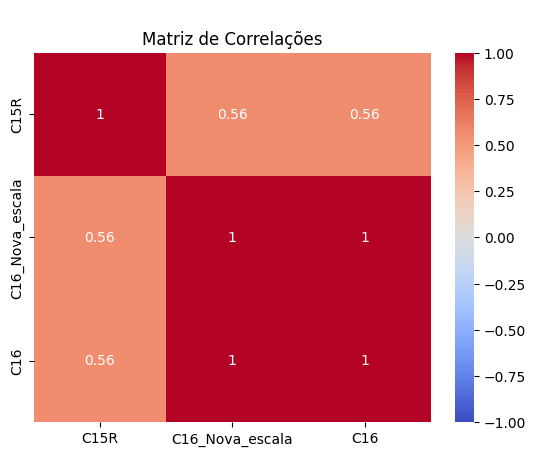

In [38]:
# Exemplo de uso
colunas_analise = ['C15R', 'C16_Nova_escala', 'C16']  # Colunas de interesse
analisar_consistencia_interna(df, colunas_analise, exibir_correlacoes=True, exibir_resumo=True, exibir_heatmap=True)